<h1 align=center><font size = 5>Capstone Project - The Battle of Neighborhoods</font></h1>


##  1. Description of the Problem and Discussion of the Background 

### Introduction/Business Problem
Due to increasing popularity of drinking bubble tea (a new variety of tea) globally, an investor came to me with an idea of opening a bubble tea shop. Bubble Tea is a Taiwanese tea-based drink invented in Tainan and Taichung in the 1980s. Recipes contain tea of some kind, flavors or milk, as well as sugar. Toppings, such as chewy tapioca balls, popping boba, fruit jelly, grass jelly, agar jelly, and puddings are often added. 

Investor's main concern is to get a recommendation of the most suitable location to open bubble tea shop in New York. Furthermore, rental price of the shop is not the main concern of the investors. Hence, we should consider a number of factors that could potentially affect how the business would go and also we have to the right neighborhood. With the help from the tools of data science, we can analyze the neighborhoods and decide the best spot to start the business.






### Factors affecting the business
Below are some of the main factors that might affect how well the business goes.

#### Restaurants nearby
Most people would like to get a cup of bubble tea after they have their lunch or dinner. So it is best to set up the bubble tea shop near restaurants.  Foursquare are able to provide us with the data of each neighborhood with the information on their top restaurants and even photos and comments. 

#### Cuisine Type
People from different neighborhoods may have very different tastes in food which in turns affects the likelihood of them buying bubble tea after having a good meal. Hence, Cuisine type also an important factor to consider. Customers who enjoy a specific type of cuisine might also share some common interests and characteristics and these characteristics can be analyzed using the data science tools we have learned.

#### Demographic of the Neighborhoods and Facilities Nearby
Demographical data affect how well the restaurant runs. It is best to set up bubble tea shop in the area with the Most Frequent venues. For example, in an area near restaurants have high popularity or near cinemas and shopping malls.

## 2. Data Preparation

Most of the data used in this project will be taken from Foursquare API. The data are crowd sourced, comprehensive geographical data source. With Foursquare API, we are able to get insight on the most popular venues in each neighborhood, ratings and customer comments on those venues.

For this project, I will only be analyzing neighborhood in Manhattan due to large amount of restaurants, cinemas and large diversity in population. I will also be using the information of these neighborhoods from Foursquare, especially the ratings and rankings for restaurants in different neighborhoods to get knowledge of the preferences of customers in each neighborhood. Their preferences will then help us decide the best location to set up the business.

For New York City's Boroughs, Neighborhoods and their coordinate values, we use the below JSON file.

https://cocl.us/new_york_dataset

From the above JSON file, we extract only the Bronx Borough’s Neighborhoods.


In [16]:
# import the necessary Libraries 


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import sys

import io
from bs4 import BeautifulSoup



In [13]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Next, we will load the data and take a quick look at the data.


In [18]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
newyork_data

Since all the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [ ]:
neighborhoods_data = newyork_data['features']

In [21]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [27]:
#We now transform the above data of nested Python dictionaries into a pandas dataframe.
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [28]:
#we now check the properties of our dataset
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


## 3. Methodology

We now filter out the boroughs for Manhattan from the dataframe

In [32]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


We now plot these neighborhoods on the map of Manhattan for visualization

In [34]:
# obtain the geographical coordinates of Manhattan.
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


we are going to start using the Foursquare API to explore the neighborhoods and segment them.

In [38]:
CLIENT_ID = '3KAWFACLDKT0GKGK2AB5NUZM10RQ31EDB34XDJWJ5EPVCTFM' # your Foursquare ID
CLIENT_SECRET = 'UICEZJW4LNYVL3ZR3L4Z03Z3S0GZVU3H0SCQUJ3ZCCWYLBW1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3KAWFACLDKT0GKGK2AB5NUZM10RQ31EDB34XDJWJ5EPVCTFM
CLIENT_SECRET:UICEZJW4LNYVL3ZR3L4Z03Z3S0GZVU3H0SCQUJ3ZCCWYLBW1


To decide which neighborhood is best for opening Bubble Tea shop, We will explore the areas around all the neighborhoods.

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [41]:
LIMIT = 100

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [42]:
print ("Shape of the Venues Dataframe: ", manhattan_venues.shape)
manhattan_venues.head()

Shape of the Venues Dataframe:  (3331, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


Now, we check how many venues were returned for each neighborhood. To make our analysis easier, We will remove neighborhood with number of Venue Category less than the maximum count which is 100. This is because we are concern with the neighborhood which have quite a lot of activities.

In [119]:
manhattan_venuecount=manhattan_venues.groupby('Neighborhood').count()
venue_count=manhattan_venuecount['Venue Category']
df_venue_count=venue_count.to_frame(name='Venue frequency')
df_venue_count

,Venue frequency
Neighborhood,
Battery Park City,100
Carnegie Hill,100
Central Harlem,47
Chelsea,100
Chinatown,100
Civic Center,100
Clinton,100
East Harlem,44
East Village,100


In [141]:
df_venue_count_max=df_venue_count[df_venue_count['Venue frequency']==100]
df_venue_count_max.reset_index(inplace=True)
df_venue_count_max

,Neighborhood,Venue frequency
0,Battery Park City,100
1,Carnegie Hill,100
2,Chelsea,100
3,Chinatown,100
4,Civic Center,100
5,Clinton,100
6,East Village,100
7,Financial District,100
8,Flatiron,100
9,Gramercy,100


In [153]:
Neighborhood_list= df_venue_count_max['Neighborhood'].tolist()
manhattan_venues2 = manhattan_venues.loc[manhattan_venues['Neighborhood'].isin(Neighborhood_list)]
manhattan_venues2.reset_index(inplace=True)


In [154]:
print(manhattan_venues2['Venue Category'].value_counts())

Italian Restaurant                          114
Coffee Shop                                  96
American Restaurant                          65
Hotel                                        60
Bakery                                       54
Gym                                          52
Gym / Fitness Center                         49
Café                                         49
Pizza Place                                  48
Cocktail Bar                                 48
French Restaurant                            47
Spa                                          44
Sushi Restaurant                             42
Wine Shop                                    40
Bar                                          40
Japanese Restaurant                          39
Park                                         38
Wine Bar                                     37
Clothing Store                               35
Ice Cream Shop                               35
Chinese Restaurant                      

### We now create a Data-frame with the 10 Most Frequently Occuring Venue_Category

In [163]:
# create a dataframe of top 10 categories
manhattan_Venues_Top10 = manhattan_venues2['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
manhattan_Venues_Top10=manhattan_Venues_Top10.reset_index()


manhattan_Venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
manhattan_Venues_Top10

,Venue Category,Frequency
0,Italian Restaurant,114
1,Coffee Shop,96
2,American Restaurant,65
3,Hotel,60
4,Bakery,54
5,Gym,52
6,Gym / Fitness Center,49
7,Café,49
8,Pizza Place,48
9,Cocktail Bar,48


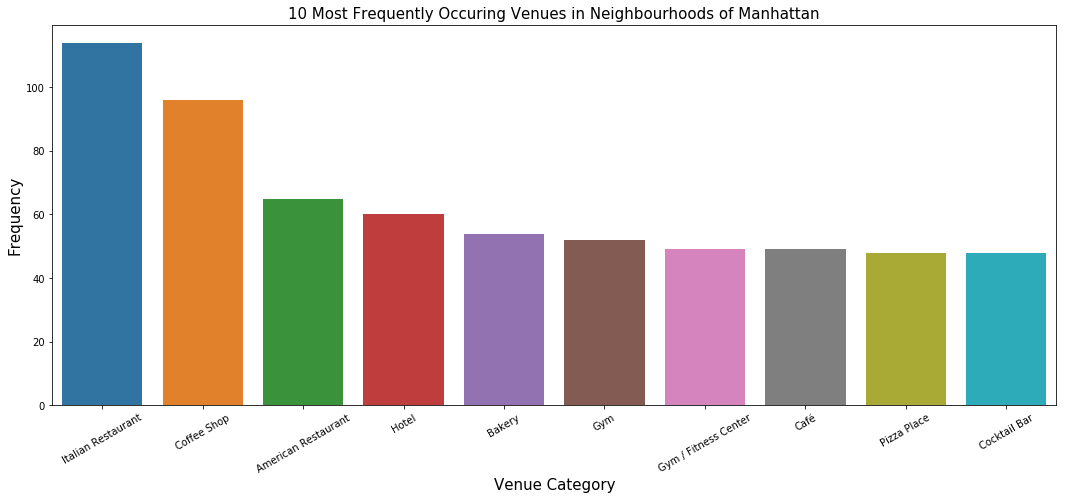

In [165]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=manhattan_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Neighbourhoods of Manhattan', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)

plt.show()

In [167]:
### We Use One Hot Encoding to Get More Information about the Venue Categories 
manhattan_onehot = pd.get_dummies(manhattan_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]


In [168]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Snack Place,Soba Restaurant,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tai

In [169]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.07
2          Hotel  0.05
3            Gym  0.04
4  Memorial Site  0.04


----Carnegie Hill----
                 venue  freq
0          Coffee Shop  0.06
1          Pizza Place  0.06
2                 Café  0.04
3                  Gym  0.03
4  Japanese Restaurant  0.03


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1      Ice Cream Shop  0.05
2  Italian Restaurant  0.05
3           Nightclub  0.04
4              Bakery  0.04


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1  American Restaurant  0.04
2         Cocktail Bar  0.04
3   Dim Sum Restaurant  0.03
4                  Spa  0.03


----Civic Center----
                  venue  freq
0    Italian Restaurant  0.06
1  Gym / Fitness Center  0.05
2                 Hotel  0.04
3           Coffee Shop  0.04
4        Sandwich Place  0.04


----Clinton----
                  venue  freq
0      

### We Create a DataFrame with Top 10 Venues for Each District

In [197]:
## Define a Function to select the top 10 rows 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [198]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Wine Shop,Italian Restaurant,Clothing Store,Department Store,Burger Joint
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Japanese Restaurant,Spa,Bookstore,Cosmetics Shop,Bar,French Restaurant,Yoga Studio
2,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,Nightclub,Theater,American Restaurant,Hotel,Art Gallery,Seafood Restaurant
3,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Dumpling Restaurant,Salon / Barbershop,Spa,Vietnamese Restaurant,Ice Cream Shop
4,Civic Center,Italian Restaurant,Gym / Fitness Center,French Restaurant,Hotel,Sandwich Place,Coffee Shop,Yoga Studio,Spa,Cocktail Bar,Bakery
5,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,American Restaurant,Hotel,Coffee Shop,Spa,Wine Shop,New American Restaurant,Food Court
6,East Village,Bar,Wine Bar,Ice Cream Shop,Chinese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Ramen Restaurant,Cocktail Bar
7,Financial District,Coffee Shop,Hotel,American Restaurant,Wine Shop,Gym,Steakhouse,Juice Bar,Italian Restaurant,Café,Gym / Fitness Center
8,Flatiron,Gym,Yoga Studio,Gym / Fitness Center,American Restaurant,Japanese Restaurant,Cosmetics Shop,New American Restaurant,Spa,Clothing Store,Café
9,Gramercy,Pizza Place,American Restaurant,Bar,Italian Restaurant,Bagel Shop,Cocktail Bar,Hotel,Thai Restaurant,Thrift / Vintage Store,Mexican Restaurant


### Clustering the Manhattan Neighborhoods using K-Means

In [199]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 3, 0, 1, 2, 0, 3, 0], dtype=int32)

We now create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [200]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Neighborhood_list= df_venue_count_max['Neighborhood'].tolist()
manhattan_data2 = manhattan_data.loc[manhattan_data['Neighborhood'].isin(Neighborhood_list)]

manhattan_merged = manhattan_data2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!



,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Manhattan,Chinatown,40.715618,-73.994279,3,Chinese Restaurant,Cocktail Bar,American Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Dumpling Restaurant,Salon / Barbershop,Spa,Vietnamese Restaurant,Ice Cream Shop
8,Manhattan,Upper East Side,40.775639,-73.960508,2,Italian Restaurant,Exhibit,Coffee Shop,Bakery,Juice Bar,Art Gallery,Gym / Fitness Center,French Restaurant,Spa,Hotel
9,Manhattan,Yorkville,40.775930,-73.947118,0,Italian Restaurant,Bar,Coffee Shop,Gym,Sushi Restaurant,Pizza Place,Wine Shop,Deli / Bodega,Mexican Restaurant,Diner
10,Manhattan,Lenox Hill,40.768113,-73.958860,0,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cosmetics Shop,Gym,Sporting Goods Shop,Burger Joint,Café,Gym / Fitness Center
12,Manhattan,Upper West Side,40.787658,-73.977059,3,Italian Restaurant,Wine Bar,Bar,Indian Restaurant,Mediterranean Restaurant,Bakery,Vegetarian / Vegan Restaurant,Coffee Shop,Yoga Studio,Café


In [201]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [205]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Yorkville,Italian Restaurant,Bar,Coffee Shop,Gym,Sushi Restaurant,Pizza Place,Wine Shop,Deli / Bodega,Mexican Restaurant,Diner
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Sushi Restaurant,Cosmetics Shop,Gym,Sporting Goods Shop,Burger Joint,Café,Gym / Fitness Center
15,Midtown,Hotel,Coffee Shop,American Restaurant,Theater,Cocktail Bar,Clothing Store,Steakhouse,Bookstore,Spa,Japanese Restaurant
16,Murray Hill,Coffee Shop,Hotel,Sandwich Place,Japanese Restaurant,Gym,Salon / Barbershop,Italian Restaurant,French Restaurant,Sushi Restaurant,New American Restaurant
27,Gramercy,Pizza Place,American Restaurant,Bar,Italian Restaurant,Bagel Shop,Cocktail Bar,Hotel,Thai Restaurant,Thrift / Vintage Store,Mexican Restaurant
29,Financial District,Coffee Shop,Hotel,American Restaurant,Wine Shop,Gym,Steakhouse,Juice Bar,Italian Restaurant,Café,Gym / Fitness Center
30,Carnegie Hill,Coffee Shop,Pizza Place,Café,Japanese Restaurant,Spa,Bookstore,Cosmetics Shop,Bar,French Restaurant,Yoga Studio
32,Civic Center,Italian Restaurant,Gym / Fitness Center,French Restaurant,Hotel,Sandwich Place,Coffee Shop,Yoga Studio,Spa,Cocktail Bar,Bakery
34,Sutton Place,Gym / Fitness Center,Furniture / Home Store,Italian Restaurant,Indian Restaurant,Dessert Shop,Pizza Place,Juice Bar,American Restaurant,Gym,Bakery
35,Turtle Bay,Italian Restaurant,Sushi Restaurant,Coffee Shop,Steakhouse,Ramen Restaurant,Wine Bar,French Restaurant,Japanese Restaurant,Park,Indian Restaurant


In [206]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Lincoln Square,Gym / Fitness Center,Theater,Concert Hall,Plaza,Café,Performing Arts Venue,French Restaurant,Italian Restaurant,Opera House,Indie Movie Theater
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,American Restaurant,Hotel,Coffee Shop,Spa,Wine Shop,New American Restaurant,Food Court


In [207]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Bakery,Juice Bar,Art Gallery,Gym / Fitness Center,French Restaurant,Spa,Hotel
17,Chelsea,Coffee Shop,Ice Cream Shop,Italian Restaurant,Bakery,Nightclub,Theater,American Restaurant,Hotel,Art Gallery,Seafood Restaurant
19,East Village,Bar,Wine Bar,Ice Cream Shop,Chinese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Coffee Shop,Ramen Restaurant,Cocktail Bar
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Park,Wine Bar,American Restaurant,Jazz Club,Gastropub,Bakery,Coffee Shop
28,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Wine Shop,Italian Restaurant,Clothing Store,Department Store,Burger Joint
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Grocery Store,Boutique,Sandwich Place,Sushi Restaurant,Rock Club,Coffee Shop,Pizza Place


In [208]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Dumpling Restaurant,Salon / Barbershop,Spa,Vietnamese Restaurant,Ice Cream Shop
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Indian Restaurant,Mediterranean Restaurant,Bakery,Vegetarian / Vegan Restaurant,Coffee Shop,Yoga Studio,Café
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,French Restaurant,Ice Cream Shop,Indian Restaurant,Café,Seafood Restaurant,Burger Joint,Cosmetics Shop
21,Tribeca,Park,Café,Spa,Italian Restaurant,Boutique,American Restaurant,Wine Shop,Wine Bar,Gym,Coffee Shop
22,Little Italy,Bakery,Bubble Tea Shop,Sandwich Place,Hotel,Italian Restaurant,Café,Seafood Restaurant,Salon / Barbershop,Mediterranean Restaurant,Clothing Store
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Italian Restaurant,Art Gallery,Mediterranean Restaurant,Men's Store,Bakery,Sporting Goods Shop
38,Flatiron,Gym,Yoga Studio,Gym / Fitness Center,American Restaurant,Japanese Restaurant,Cosmetics Shop,New American Restaurant,Spa,Clothing Store,Café


In [209]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Coffee Shop,American Restaurant,Cosmetics Shop,Cocktail Bar,Yoga Studio,Gym / Fitness Center
